<a href="https://colab.research.google.com/github/Srivathshan-Paramalingam-0505/DMML_Coding_Challenge_Team_Zoom/blob/main/Text_classification_into_difficulty_levels_using_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Quick Intro

In this notebook, we are going to implement a model based on the one created by Madhuri Mamandal (https://github.com/madhurimamandal/Text-classification-into-difficulty-levels). We are going to adapt the code to make it work in our situation and define the best features to classify a series of sentences based on the level of difficulty.



First, let's load the dataset we are going to work on, along with the unlabelled data we need for the submission part. :)

In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# install Kaggle
! pip install kaggle

#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Coding_Challenge/kaggle.json ~/.kaggle/kaggle.json

# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 80.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/Coding_Challenge/training_data.csv')
df_pred = pd.read_csv('drive/MyDrive/Coding_Challenge/unlabelled_test_data.csv')

In [ ]:
base_rate = (df['difficulty'].value_counts() / len(df)).max()
base_rate

0.169375

###First step : Features extraction

We are going to showcase the different functions we use to extract what we consider important features to analyse a sentence based on its difficulty. Let's take a sentence to illustrate the function:

In [ ]:
df.sentence.iloc[0]

"Les coûts kilométriques réels peuvent diverger sensiblement des valeurs moyennes en fonction du moyen de transport utilisé, du taux d'occupation ou du taux de remplissage, de l'infrastructure utilisée, de la topographie des lignes, du flux de trafic, etc."

In [ ]:
import re
from collections import Counter
import nltk
nltk.download('stopwords')
#Preprocessing
def preprocessing(sentence):    
        text1 = re.sub('[^a-zA-Z]', ' ', sentence)
        return [word for word in text1.lower().split() if not word in set(stopwords.words('french'))]

#Feature extraction

def avg_word_length(sentence):
    words = sentence.split()
    total_length = 0
    for word in words:
        length = 0
        for char in word:
            if char.isalpha():
                length += 1
        total_length += length
    avg_length = total_length / len(words)
    return avg_length

def dif_words( text):
        frequency = Counter(text)
        return len(frequency)

def count_syllables(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def avg_syllables(sentence):
    words = sentence.split()
    total_syllables = 0
    for word in words:
        syllables = count_syllables(word)
        total_syllables += syllables
    avg_syllables = total_syllables / len(words)
    return avg_syllables



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Second step: Dataframe creation with the features

Now we are going to use the functions to add new columns to the dataframe.

In [ ]:
av_w_l=df.sentence.apply(avg_word_length)
av_w_l
df['average word length']=av_w_l
df

,id,sentence,difficulty,average word length
0,0,Les coûts kilométriques réels peuvent diverger...,C1,5.526316
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,3.916667
2,2,Le test de niveau en français est sur le site ...,A1,4.000000
3,3,Est-ce que ton mari est aussi de Boston?,A1,3.875000
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,4.794118
...,...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2,5.230769
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1,4.619048
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2,4.642857
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2,5.937500


In [ ]:
dif_w=df.sentence.apply(dif_words)
df['number of unique words']=dif_w
df

,id,sentence,difficulty,average word length,number of unique words
0,0,Les coûts kilométriques réels peuvent diverger...,C1,5.526316,30
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,3.916667,23
2,2,Le test de niveau en français est sur le site ...,A1,4.000000,21
3,3,Est-ce que ton mari est aussi de Boston?,A1,3.875000,18
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,4.794118,32
...,...,...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2,5.230769,27
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1,4.619048,26
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2,4.642857,22
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2,5.937500,31


In [ ]:
av_sy=df.sentence.apply(avg_syllables)
df['average syllables']=av_sy
df

,id,sentence,difficulty,average word length,number of unique words,average syllables
0,0,Les coûts kilométriques réels peuvent diverger...,C1,5.526316,30,1.815789
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,3.916667,23,1.083333
2,2,Le test de niveau en français est sur le site ...,A1,4.000000,21,1.384615
3,3,Est-ce que ton mari est aussi de Boston?,A1,3.875000,18,1.375000
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,4.794118,32,1.558824
...,...,...,...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2,5.230769,27,1.769231
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1,4.619048,26,1.476190
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2,4.642857,22,1.571429
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2,5.937500,31,1.750000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))

features = tfidf.fit_transform(df.sentence)

df_vect=pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)
df_vect

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.200821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_vect['difficulty']=df['difficulty']
df_vect['average word length']=av_w_l
df_vect['number of unique words']=dif_w
df_vect['average syllables']=av_sy
df_vect

,000,02h00,03h00,10,100,1000,10000,105,11,110,...,êtres,êut,île,îles,ôta,ôter,difficulty,average word length,number of unique words,average syllables
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,C1,5.526316,30,1.815789
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,A1,3.916667,23,1.083333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,A1,4.000000,21,1.384615
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,A1,3.875000,18,1.375000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,B1,4.794118,32,1.558824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,B2,5.230769,27,1.769231
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,C1,4.619048,26,1.476190
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,A2,4.642857,22,1.571429
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,C2,5.937500,31,1.750000


### Third step: Train our different models


Now that we have our new dataframe with the features, we can train our model to see how accurate it is.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Reading the CSV
Dataframe_Final =df_vect

#Splitting into features and classes
X = Dataframe_Final.drop('difficulty',axis=1)
y = Dataframe_Final['difficulty']

#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)
 

X_train

,000,02h00,03h00,10,100,1000,10000,105,11,110,...,être,êtres,êut,île,îles,ôta,ôter,average word length,number of unique words,average syllables
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.526316,30,1.815789
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.916667,23,1.083333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,21,1.384615
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.875000,18,1.375000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.794118,32,1.558824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.882353,20,1.470588
3836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.558442,33,1.389610
3837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,14,1.166667
3838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.272727,25,1.454545


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
#Define a model AND apply vectorizer
LR = LogisticRegression(solver='lbfgs', max_iter=100, random_state=50)

# Using default tokenizer in TfidfVectorizer
LR.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

Let's call our model metrics function to get the confusion matrix alongside the precision of the model

In [ ]:
#function to calculate metrics of the models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def models_metrics (true, pred):
  precision = precision_score(true, pred, average='weighted')
  recall = recall_score(true, pred, average='weighted')
  f1 = f1_score(true, pred, average='weighted')
  accuracy = accuracy_score(true,pred)
  conf_mat = confusion_matrix(true, pred)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  print(f"ACCURACY SCORE:\n{accuracy:.4f}")
  print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
  return precision, recall, f1, accuracy

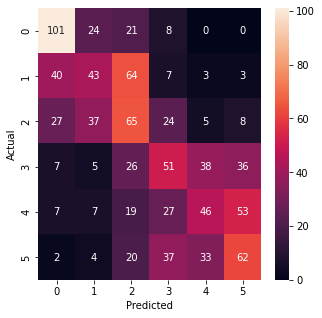

ACCURACY SCORE:
0.3833
CLASSIFICATION REPORT:
	Precision: 0.3802
	Recall: 0.3833
	F1_Score: 0.3781


In [ ]:
#Prediction on test
y_pred_lr = LR.predict(X_test)
precision_lr_vec, recall_lr_vec, f1_lr_vec, accruacy_lr_vec= models_metrics(y_test,y_pred_lr)

Now that we got that accuracy, we can try out other models to see which one fits the best for our new dataset.

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

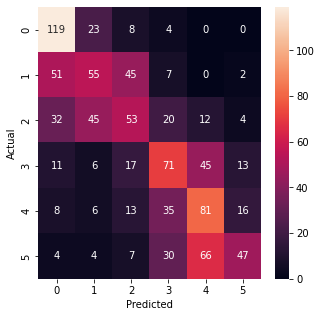

ACCURACY SCORE:
0.4437
CLASSIFICATION REPORT:
	Precision: 0.4472
	Recall: 0.4437
	F1_Score: 0.4328


In [ ]:
y_pred_rfc=rfc.predict(X_test)
precision_rfc_vec, recall_rfc_vec, f1_rfc_vec, accruacy_rfc_vec=models_metrics(y_test,y_pred_rfc)

In [ ]:
accruacy_lr_vec

0.38333333333333336

In [ ]:
#GridSearch for RandomForest
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10]}

# Create the model
model = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print(test_score)


{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
0.446875


In [ ]:
rfc_grid=RandomForestClassifier(max_depth= None, min_samples_split= 5, n_estimators= 200)
rfc_grid.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

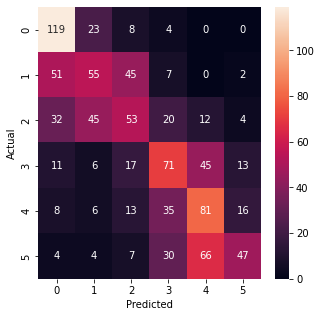

ACCURACY SCORE:
0.4437
CLASSIFICATION REPORT:
	Precision: 0.4472
	Recall: 0.4437
	F1_Score: 0.4328


In [ ]:
precision_rfc_vec2, recall_rfc_vec2, f1_rfc_vec2, accruacy_rfc_vec2=models_metrics(y_test,y_pred_rfc)

In [ ]:
#SVC
from sklearn.svm import SVC
svc = SVC(gamma="scale", random_state=42,kernel = 'linear', coef0 = 0.5)
svc.fit(X_train,y_train)

SVC(coef0=0.5, kernel='poly', random_state=42)

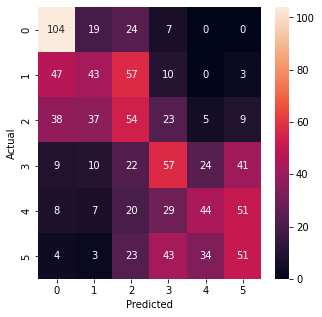

ACCURACY SCORE:
0.3677
CLASSIFICATION REPORT:
	Precision: 0.3659
	Recall: 0.3677
	F1_Score: 0.3608


In [ ]:
y_svc_pred=svc.predict(X_test)
precision_svc_vec, recall_svc_vec, f1_svc_vec, accruacy_svc_vec= models_metrics(y_test,y_svc_pred)

###Recap of the results: 

In [ ]:
metrics = {'Model' : ['Logistic Regression','Random forest','Support vector classification (SVC)'], 
           'Base_rate' : [base_rate, base_rate, base_rate],
           'Accuracy' : [accruacy_lr_vec, accruacy_rfc_vec, accruacy_svc_vec],
           'Precision' : [precision_lr_vec, precision_rfc_vec, precision_svc_vec],
           'Recall' : [recall_lr_vec, recall_rfc_vec, recall_svc_vec],
           'F1 score' : [f1_lr_vec, f1_rfc_vec, f1_svc_vec]}
df_comparison_featuresextract = pd.DataFrame(data = metrics)
df_comparison_featuresextract

,Model,Base_rate,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.169375,0.383333,0.380223,0.383333,0.378124
1,Random forest,0.169375,0.443750,0.447162,0.443750,0.432809
2,Support vector classification (SVC),0.169375,0.367708,0.365884,0.367708,0.360795
